In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from functions.LoadingData import LoadData

%matplotlib inline

We are working on fake advertisement data set indicating whether or not a particular user click on an
advertisement.
This data set contains the following features:

    'Daily Time Spent on Site': consumer time on site in minutes
    'Age': cutomer age in years
    'Area Income': Avg. Income of geographical area of consumer
    'Daily Internet Usage': Avg. minutes a day consumer is on the internet
    'Ad Topic Line': Headline of the advertisement
    'City': City of consumer
    'Male': Whether or not consumer was male
    'Country': Country of consumer
    'Timestamp': Time at which consumer clicked on Ad or closed window
    'Clicked on Ad': 0 or 1 indicated clicking on Ad


### Import and describe data

Shape of DataFrame is (1000, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


None


Head of DataFrame:


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0



Dataset statistics:


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000



Number of NaN values in DataFrame:


Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64


Number of duplicates in DataFrame:


0


Visualisation of missing values in data set:


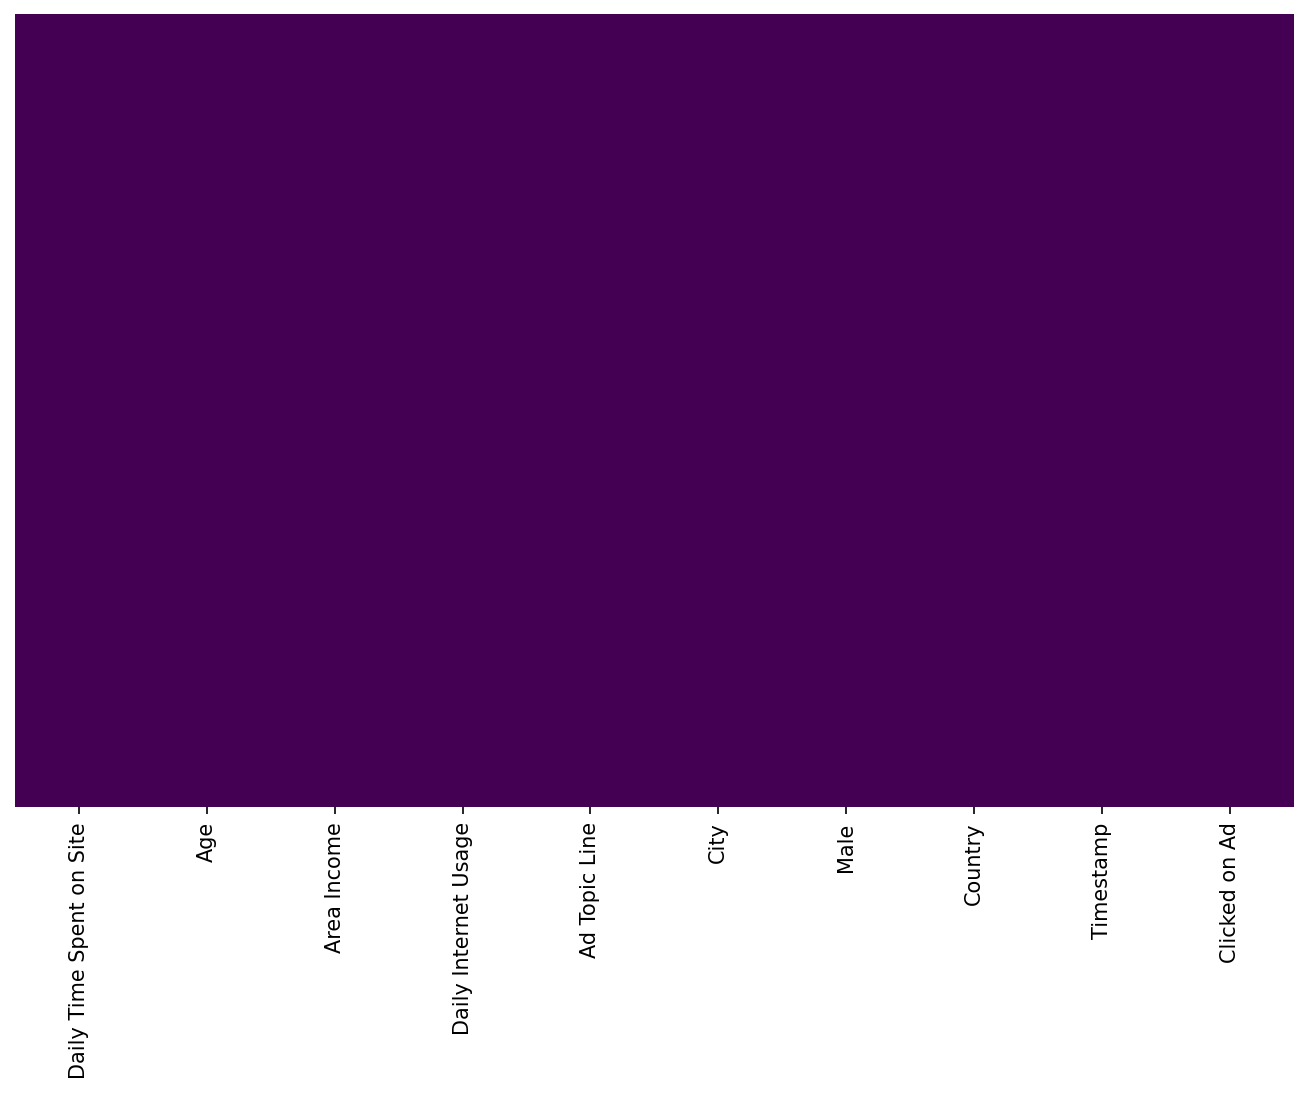

In [2]:
data = LoadData('Colab Notebooks/advertising.csv')
adv = data.create_data()

In [3]:
date = pd.to_datetime(adv['Timestamp'],)
adv['Timestamp'] = date
date

0     2016-03-27 00:53:11
1     2016-04-04 01:39:02
2     2016-03-13 20:35:42
3     2016-01-10 02:31:19
4     2016-06-03 03:36:18
              ...        
995   2016-02-11 21:49:00
996   2016-04-22 02:07:01
997   2016-02-01 17:24:57
998   2016-03-24 02:35:54
999   2016-06-03 21:43:21
Name: Timestamp, Length: 1000, dtype: datetime64[ns]

In [4]:
type(adv['Timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [5]:
adv.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


### Analysing and visualising data 

<AxesSubplot:xlabel='Age', ylabel='Daily Time Spent on Site'>

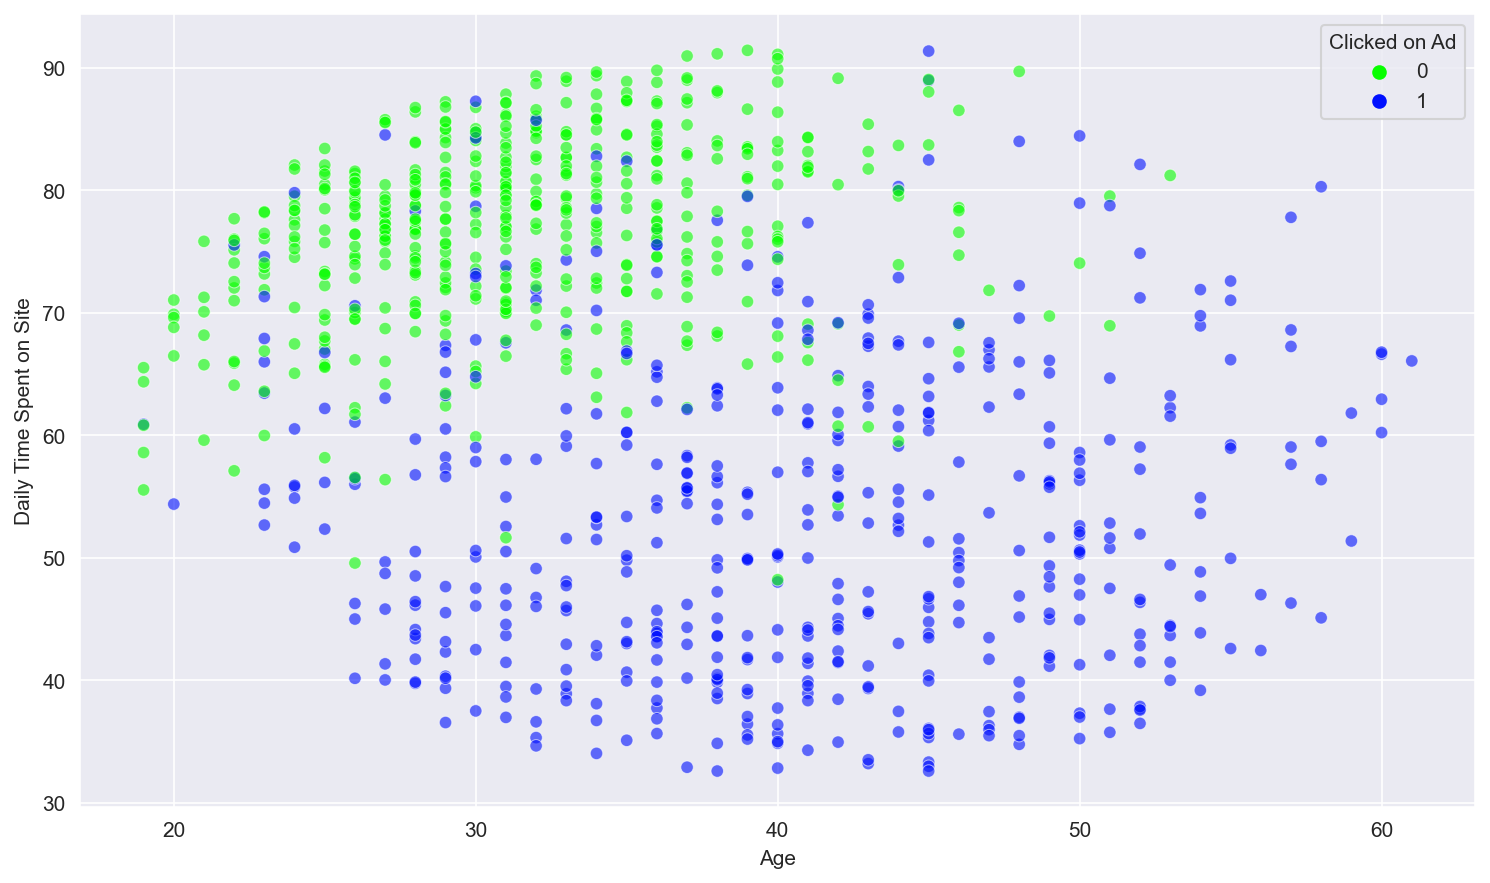

In [6]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,7),dpi=150)
sns.scatterplot(data=adv,
                x='Age',
                y='Daily Time Spent on Site',
                hue='Clicked on Ad',
                palette='hsv',
                alpha=0.6,)


As we can see there is a pattern. People that spend by average less time on the website and are older
tend to click on add.

<AxesSubplot:xlabel='Age', ylabel='Clicked on Ad'>

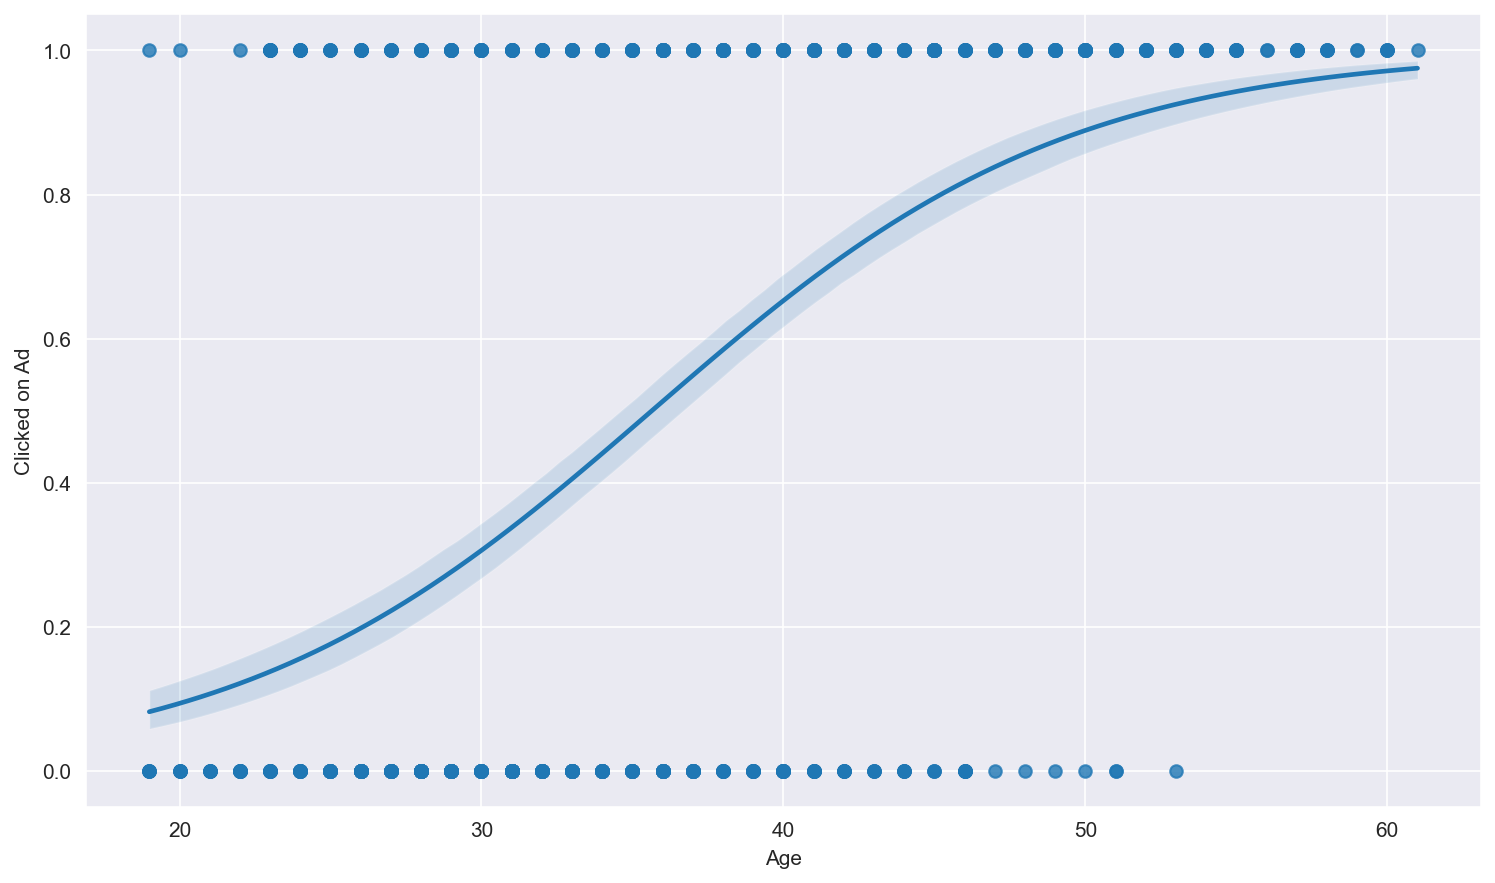

In [7]:
plt.figure(figsize=(12,7),dpi=150)
sns.regplot(data=adv,
           x='Age',
           y='Clicked on Ad',
           logistic=True)

Logistic Regression is pretty convenient that people 40+ are tend to click on the add more often based only on their age.

In [8]:
print(f'Number of unique ads on website {len(adv["Ad Topic Line"].unique())}')
#This means we cannot predict wether user clicked on add or not based on type of advertisement.

Number of unique ads on website 1000


<AxesSubplot:xlabel='Age', ylabel='count'>

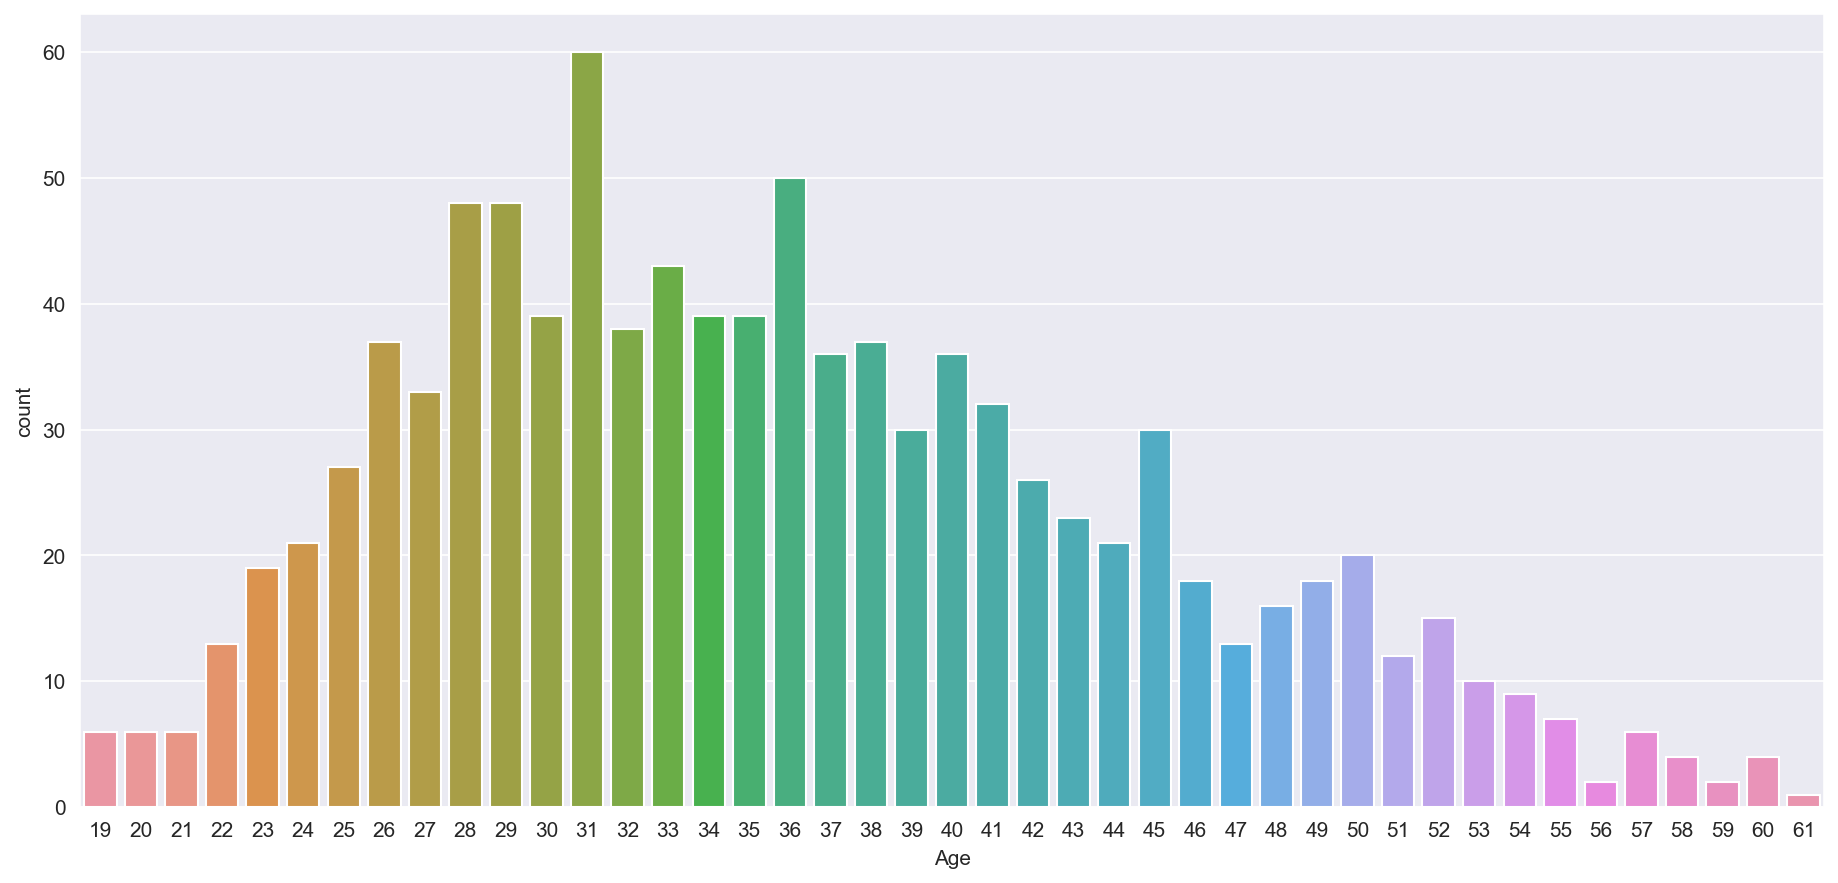

In [9]:
plt.figure(figsize=(15,7), dpi=150)
sns.countplot(data=adv,
              x='Age',)

As we can see most of the website users are in age between 25 and 42

<AxesSubplot:xlabel='Clicked on Ad', ylabel='Area Income'>

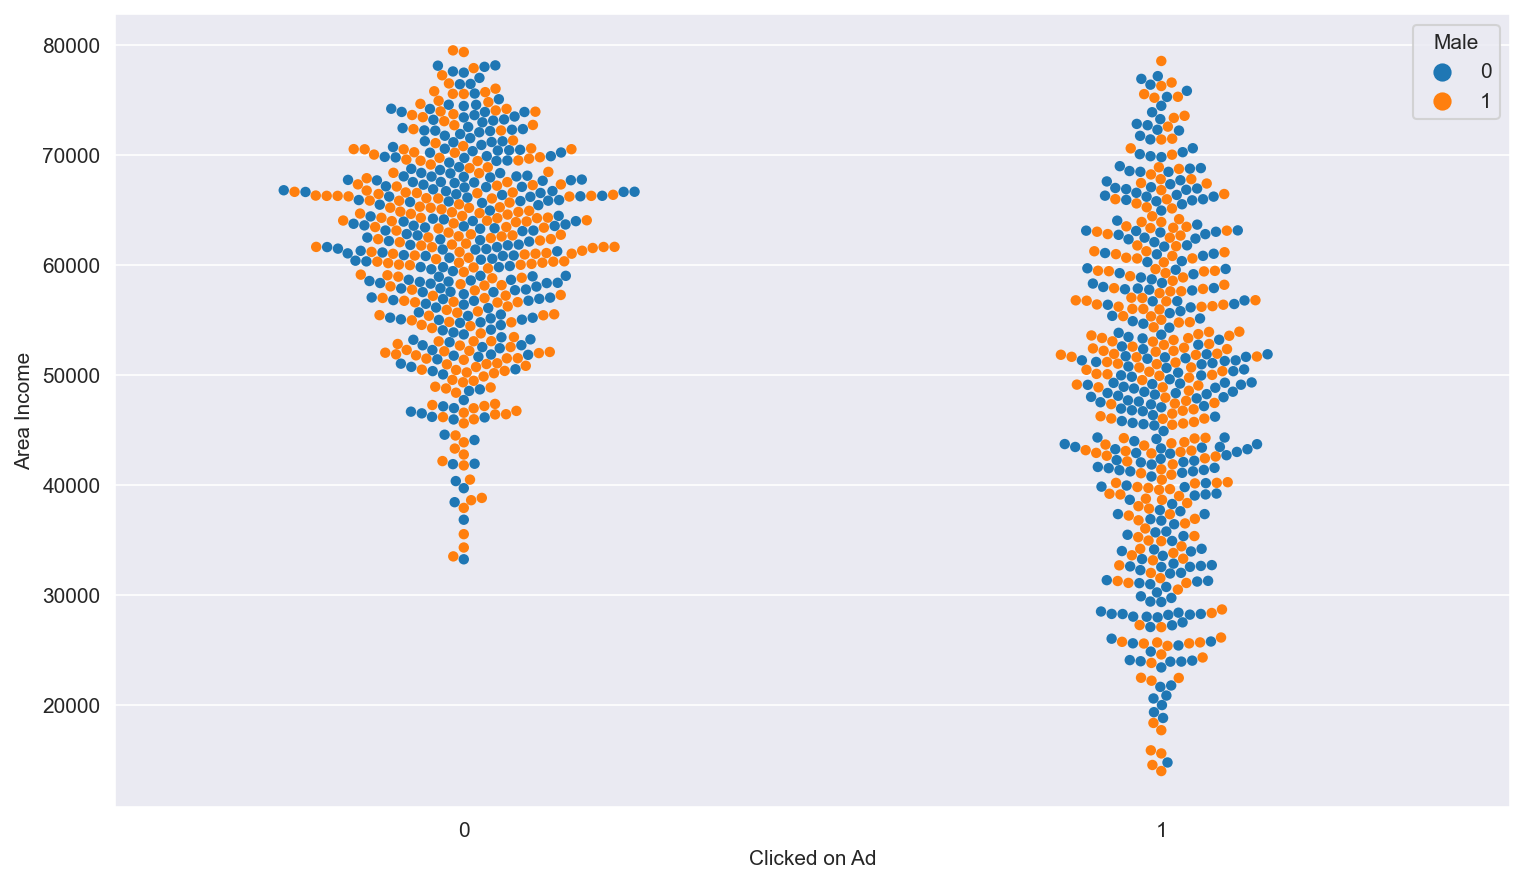

In [10]:
plt.figure(figsize=(12,7),dpi=150)
sns.swarmplot(data=adv,
             x='Clicked on Ad',
             y='Area Income',
             hue='Male')

<AxesSubplot:xlabel='Clicked on Ad', ylabel='Daily Internet Usage'>

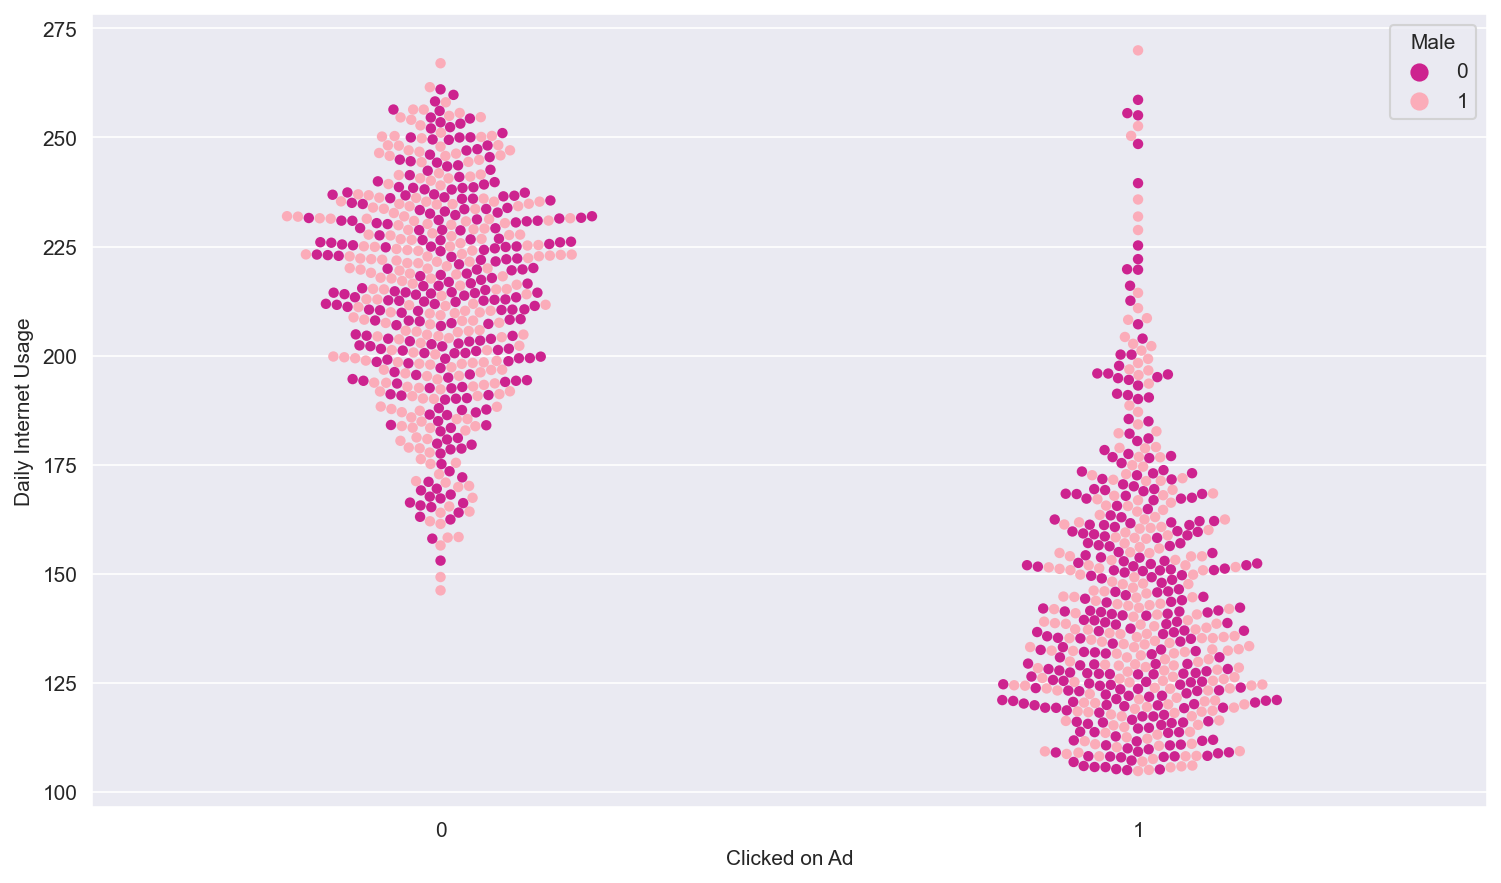

In [11]:
plt.figure(figsize=(12,7),dpi=150)
sns.swarmplot(data=adv,
             x='Clicked on Ad',
             y='Daily Internet Usage',
             palette='RdPu_r',
             hue='Male')

We are convenient that advertisements are clicked mostly by people that on average spend less time surfing the internet.

<AxesSubplot:xlabel='Daily Internet Usage', ylabel='Clicked on Ad'>

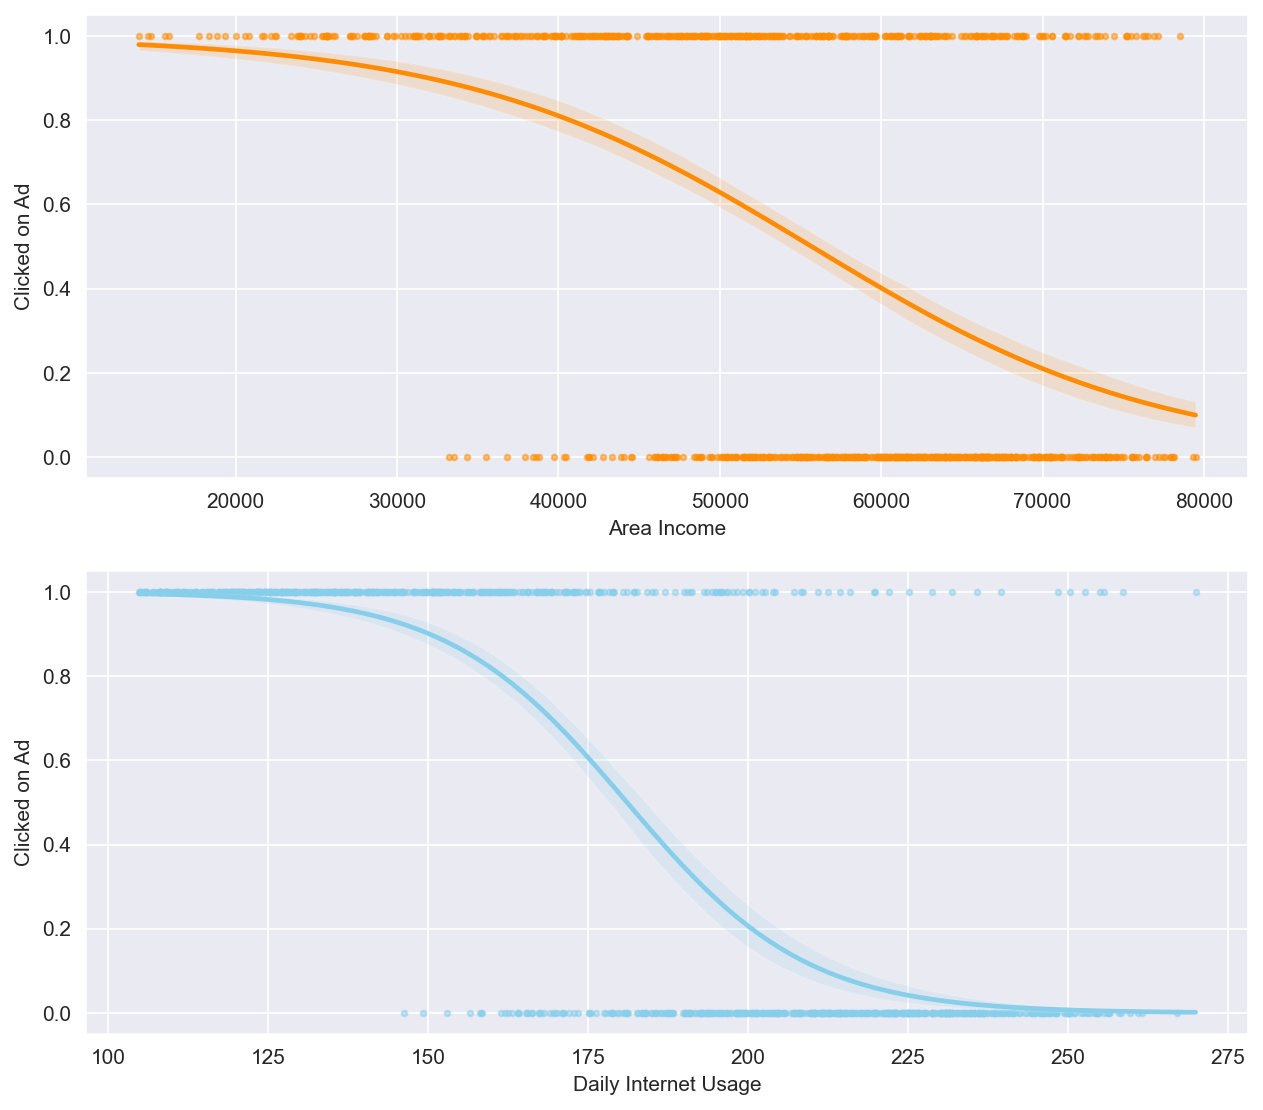

In [12]:
fig, ax = plt.subplots(2,1,figsize=(10,9), dpi=150)
sns.regplot(data=adv,
           x='Area Income',
           y='Clicked on Ad',
           logistic=True,
           color='darkorange',
           scatter_kws={'s':7, 'alpha':0.5},
           ax=ax[0])
sns.regplot(data=adv,
           x='Daily Internet Usage',
           y='Clicked on Ad',
           logistic=True,
           color='skyblue',
            scatter_kws={'s':7, 'alpha':0.5},
           ax=ax[1])

In [13]:
adv.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


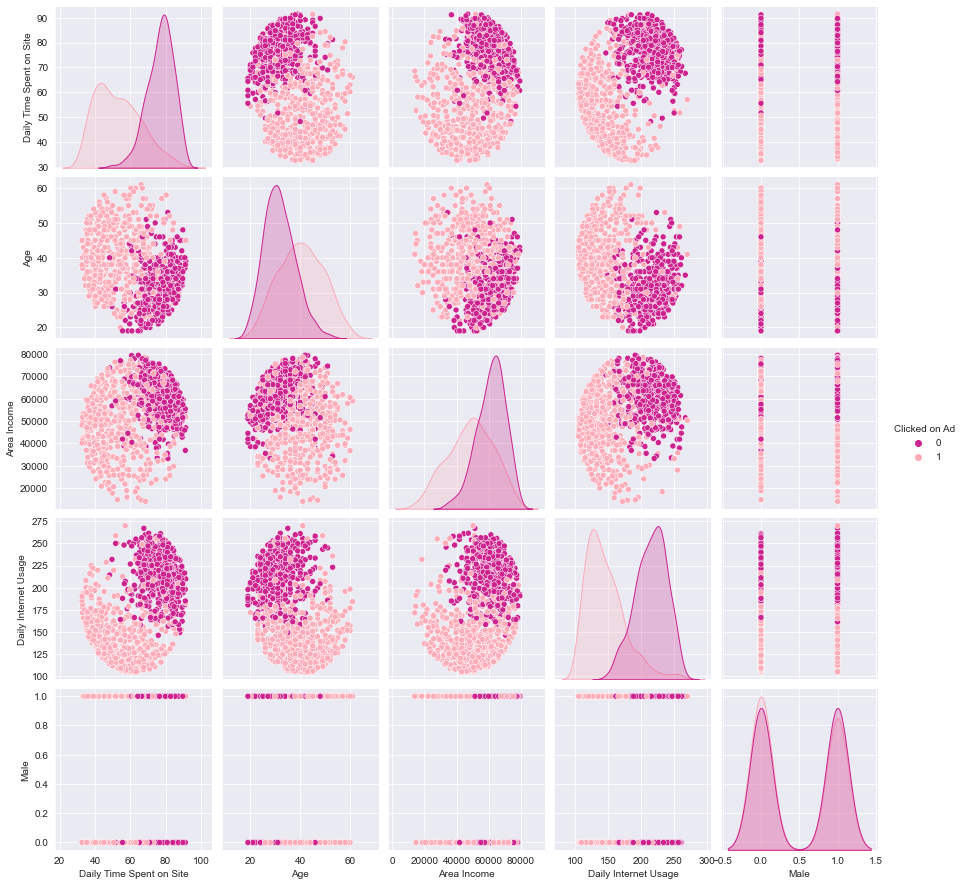

In [14]:
# plt.figure(figsize=(12,10), dpi=150)
sns.pairplot(data=adv,
             hue='Clicked on Ad',
             palette='RdPu_r')

### Cleaning and preparing data for Logistic Regression

Those atributes even if transformed for dummy variables are not going to add anything valuable to our model so we are going to get rid of those.

In [15]:
print(f'Number of unique cities is: {adv["City"].nunique()}')
print(f'Number of unique locations {adv["Country"].nunique()}')
print(f'Number of unique ads on website {len(adv["Ad Topic Line"].unique())}')

Number of unique cities is: 969
Number of unique locations 237
Number of unique ads on website 1000


In [16]:
adv.drop(columns=['City', 'Country', 'Ad Topic Line'], axis=1, inplace=True)
adv

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,1,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,1,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,0,2016-03-24 02:35:54,0


In [17]:
adv.drop(columns='Timestamp', inplace=True)

### Split data for train and test

In [18]:
X = adv.iloc[:, :5]
y = adv.iloc[:, -1]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Run machine learning algorithm

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logreg = LogisticRegression()

In [23]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [24]:
pred = logreg.predict(X_test)


### Evaluate score for Logistic Regression

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [27]:
logreg.score(X_test, y_test)

0.8966666666666666

In [28]:
logreg.predict_proba([X.iloc[34, :5]])

array([[5.40884462e-04, 9.99459116e-01]])

As we can see on particular example from X algorithm is 99% sure that this person clicked on the ad

In [29]:
X.iloc[34, :5]

Daily Time Spent on Site       57.64
Age                            57.00
Area Income                 45580.92
Daily Internet Usage          133.81
Male                            1.00
Name: 34, dtype: float64

In [30]:
y.iloc[34]

1

And in fact this person clicked on ad in reality :)

In [31]:
logreg.predict([X.iloc[34, :5]])

array([1], dtype=int64)

We endup with an algorithm that is overall 90% accurate which I will consider as pretty good result.
In fact algorithm is accurate in 96% when classify for the class 1 (Clicked the add) and 85% for class 0 (Did not click the add). It means that if we feed an algorithm with person we knew that clicked the add, we are 96% sure our model will predict class 1 (Clicked the add). 

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knmodel = KNeighborsClassifier(n_neighbors=10)

In [34]:
knmodel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [35]:
predictedkn = knmodel.predict(X_test)

In [36]:
print(classification_report(y_test, predictedkn))

              precision    recall  f1-score   support

           0       0.64      0.82      0.72       146
           1       0.76      0.56      0.65       154

    accuracy                           0.69       300
   macro avg       0.70      0.69      0.68       300
weighted avg       0.70      0.69      0.68       300



As a comparision we have accuracy of KN neighbors algorithm that did singnificantly worse than our Logistic Regression.